In [1]:
import numpy as np
from scipy.constants import m_e, c, e, physical_constants
from scipy.integrate import quad
import matplotlib.pyplot as plt

for stc setup all four cases are 
case : horizontal dist = 22 cm , height = 7.8 cm, polar location: (19.5, 180)
    1.  measured from the top edge of vertical detector angle (min, max)  = (70, 115)
    2.  measured from the centre of vertical detector angle (min, max)  = (70, 113)
    3.  measured from the bottom edge of vertical detector angle (min, max)  = (70, 160)
case : horizontal dist = 22 cm , height = 17.3 cm, polar location: (38.2, 180)
    1.  measured from the top edge of vertical detector angle (min, max)  = (52, 117)
    2.  measured from the centre of vertical detector angle (min, max)  = (52, 115)
    3.  measured from the bottom edge of vertical detector angle (min, max)  = (52, 142)
case : horizontal dist = 22 cm , height = -1.1 cm, polar location: (-3, 180)
    1.  measured from the top edge of vertical detector angle (min, max)  = (90, 135)
    2.  measured from the centre of vertical detector angle (min, max)  = (90, 153)
    3.  measured from the bottom edge of vertical detector angle (min, max)  = (90, 180)
case : horizontal dist = 22 cm , height = 10.5 cm, polar location: (23.8, 194)
    1.  measured from the top edge of vertical detector angle (min, max)  = (79.5, 124.5)
    2.  measured from the centre of vertical detector angle (min, max)  = (79.5, 142.5)
    3.  measured from the bottom edge of vertical detector angle (min, max)  = (79.5, 160.5)

In [2]:
import numpy as np
from scipy.constants import physical_constants
from scipy.integrate import quad

# Constants
r0 = physical_constants["classical electron radius"][0]  # meters
E_keV = 356  # incident energy in keV
alpha = E_keV / 511  # mc^2 in keV (no need to convert to Joules)

# Full angular range in degrees
theta_min_deg = 0
theta_max_deg = 180

# Convert to radians
theta_min = np.radians(theta_min_deg)
theta_max = np.radians(theta_max_deg)

# Azimuthal symmetry multiplier
W_const = 2 * np.pi  # integral over phi

# Klein-Nishina differential cross-section
def d_sigma_dOmega(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    E_ratio = 1 / (1 + alpha * (1 - cos_theta))
    return 0.5 * r0**2 * E_ratio**2 * (E_ratio + 1/E_ratio - sin_theta**2)

# Total Klein-Nishina cross-section (analytical expression)
def sigma_KN(alpha):
    term1 = (1 + alpha) / alpha**2
    term2 = (2 * (1 + alpha)) / (1 + 2 * alpha)
    term3 = np.log(1 + 2 * alpha) / alpha
    term4 = np.log(1 + 2 * alpha) / (2 * alpha)
    term5 = (1 + 3 * alpha) / ((1 + 2 * alpha)**2)
    return 2 * np.pi * r0**2 * (term1 * (term2 - term3) + term4 - term5)

# Numerator for integration over theta
def integrand(theta):
    return d_sigma_dOmega(theta) * np.sin(theta) * W_const

# Perform the integral over theta range
numerator, _ = quad(integrand, theta_min, theta_max)
denominator = sigma_KN(alpha)

# Scattering probability
P_detector = numerator / denominator

# Output results
print(f"Total Klein-Nishina cross-section: {denominator:.4e} m^2")
print(f"Scattering probability into {theta_min_deg}°–{theta_max_deg}°: {P_detector:.4%}")


Total Klein-Nishina cross-section: 3.3142e-29 m^2
Scattering probability into 0°–180°: 100.0000%


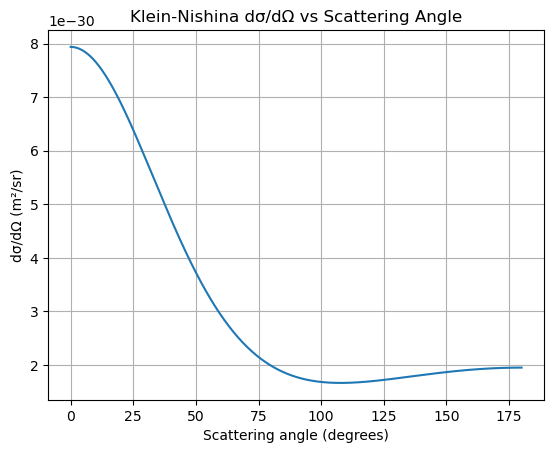

In [3]:
theta_vals = np.linspace(0, np.pi, 500)
cross_section_vals = [d_sigma_dOmega(theta) for theta in theta_vals]

plt.plot(np.degrees(theta_vals), cross_section_vals)
plt.title("Klein-Nishina dσ/dΩ vs Scattering Angle")
plt.xlabel("Scattering angle (degrees)")
plt.ylabel("dσ/dΩ (m²/sr)")
plt.grid(True)
plt.show()
